# Understanding the factors which affects a borrowers rate
## by EZE IFEANYI


## Investigation Overview
> I wanted to see and understand the factors which affects a borrowers rate and see his/her return rate




## Dataset Overview

> The dataset consist of 113937 entries with 81 columns. The attributes that were used for this presentation are - EmploymentStatus, BorrowerState,BorrowerRate,Credit Score(CreditScoreRangeLower, CreditScoreRangeUpper),Type of Loan(ListingCategory (numeric)),ProsperScore,IncomeRange,LoanCurrentDaysDelinquent,MonthlyLoanPayment,BorrowerAPR,Home Location(IsBorrowerHomeowner),Loan Term(Term),Occupation,EmploymentStatusDuration,StatedMonthlyIncome.This new dataset had a total of 113937 entries with 17 columns.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_data = pd.read_csv(r"loan_data.csv")

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Borrowers Interest Rate Loan
- From this we can see the majority or the interest rate of the loan begins to rise at the 0.04 rate and drop from the 0.14 rate.
- Majority of the borrowers rate interest start from the 0.12 rate to the 0.18 rate with 0.14 to 0.16 rate having the nighest number of borrowers interest rate for the loan.


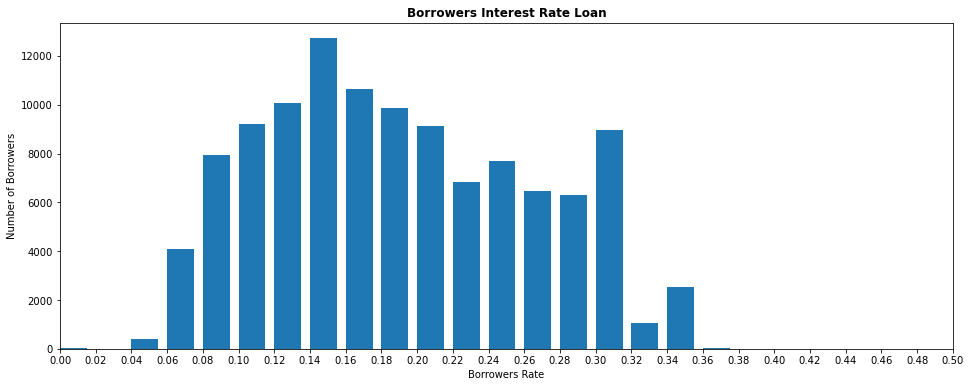

In [3]:
# Taking a deeper look in the graph
plt.figure(figsize=(16,6))
bins = np.arange(0,loan_data.borrower_rate.max()+0.02,0.02)
plt.hist(loan_data.borrower_rate,bins =bins, width=0.015)
plt.title("Borrowers Interest Rate Loan", weight = "bold")
plt.xlabel("Borrowers Rate")
plt.ylabel("Number of Borrowers")
plt.xlim(0.0,0.4)
plt.xticks(np.arange(0,loan_data.borrower_rate.max()+0.02,0.02));

## Category Listing

> - From the graph below, it shows that majority of the borrowers selected Debt consolidaton.

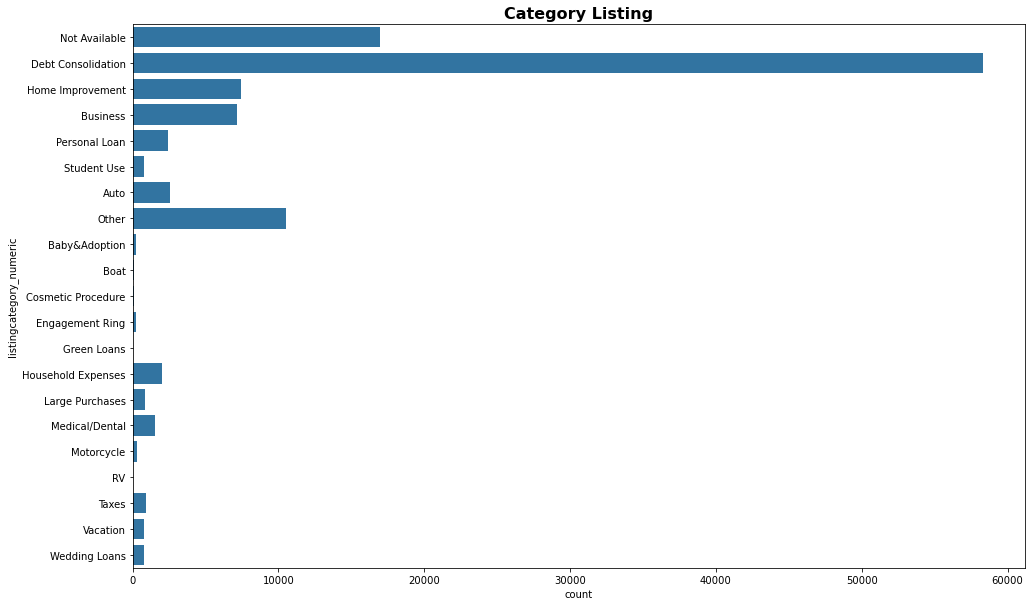

In [4]:
# From the ProsperScore data there are different categories of the listing
# The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation,
#     2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption,
#     9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 
#     14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
category = ["Not Available", "Debt Consolidation", "Home Improvement", "Business", "Personal Loan", "Student Use", "Auto",
            "Other", "Baby&Adoption", "Boat", "Cosmetic Procedure", "Engagement Ring", "Green Loans", "Household Expenses",
            "Large Purchases", "Medical/Dental", "Motorcycle", "RV", "Taxes", "Vacation", "Wedding Loans"]
color=sns.color_palette()[0]
plt.figure(figsize=(16,10))
sns.countplot(y=loan_data.listingcategory_numeric,color=color)
ticks = np.arange(0,21,1)
plt.title("Category Listing", fontsize=16, weight="bold")
plt.yticks(ticks,category);

## Income Range

> This graph shows that the income range of most people are from 25,000- 75,000, while a litle ratio are not employed

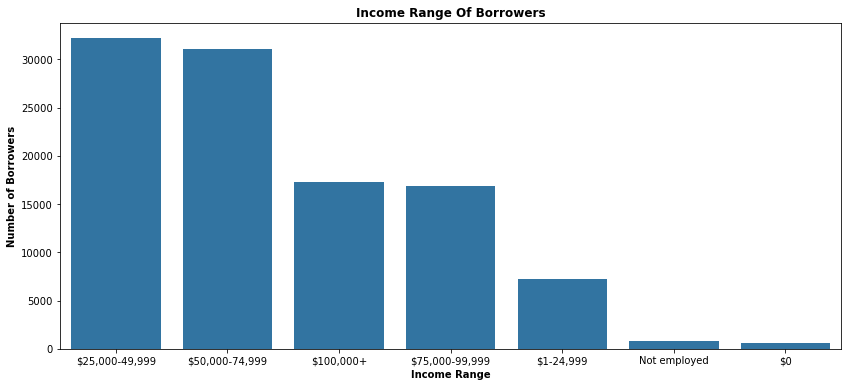

In [5]:
# Plottting the graph without the "Not displayed" section
plt.figure(figsize=(14,6))
sns.countplot(data=loan_data,x="income", color = color)
plt.title("Income Range Of Borrowers", weight = "bold")
plt.xlabel("Income Range", weight = "bold")
plt.ylabel("Number of Borrowers", weight = "bold");

## Borrower APR

> The mean of Annual Percentage Rate is 21%(0.2). 
> There is a large peak in 36%(0.36) and very few loan have an APR greater than 40%(0.4).

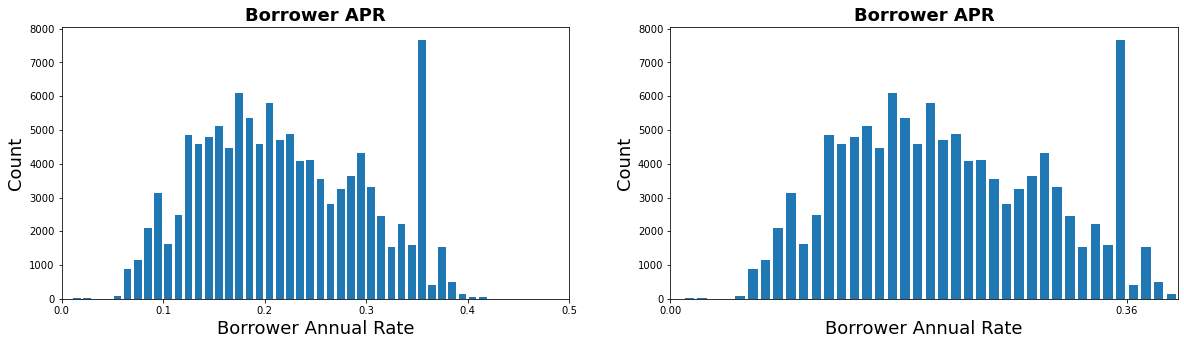

In [6]:
# plotting the graph
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(loan_data.borrower_apr,bins = np.arange(0,loan_data.borrower_apr.max()+0.01,0.01),hist_kws={"rwidth":0.75,'alpha':1.0}, kde=False)
plt.title("Borrower APR", fontsize=18, weight = "bold")
plt.xlabel("Borrower Annual Rate", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.xlim(0,0.4)
plt.xticks(np.arange(0,loan_data.borrower_apr.max()+0.01,0.1))

# This plot shows the rate of the large peak
plt.subplot(1,2,2)
sns.distplot(loan_data.borrower_apr,bins = np.arange(0,loan_data.borrower_apr.max()+0.01,0.01),hist_kws={"rwidth":0.75,'alpha':1.0}, kde=False)
plt.title("Borrower APR", fontsize=18, weight = "bold")
plt.xlabel("Borrower Annual Rate", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.xlim(0,0.4)
plt.xticks(np.arange(0,loan_data.borrower_apr.max()+0.01,0.36));

## Does Income range affects Prosper Score?

> This shows that high Prosper score is not necessarily correlated with higher incomes. 

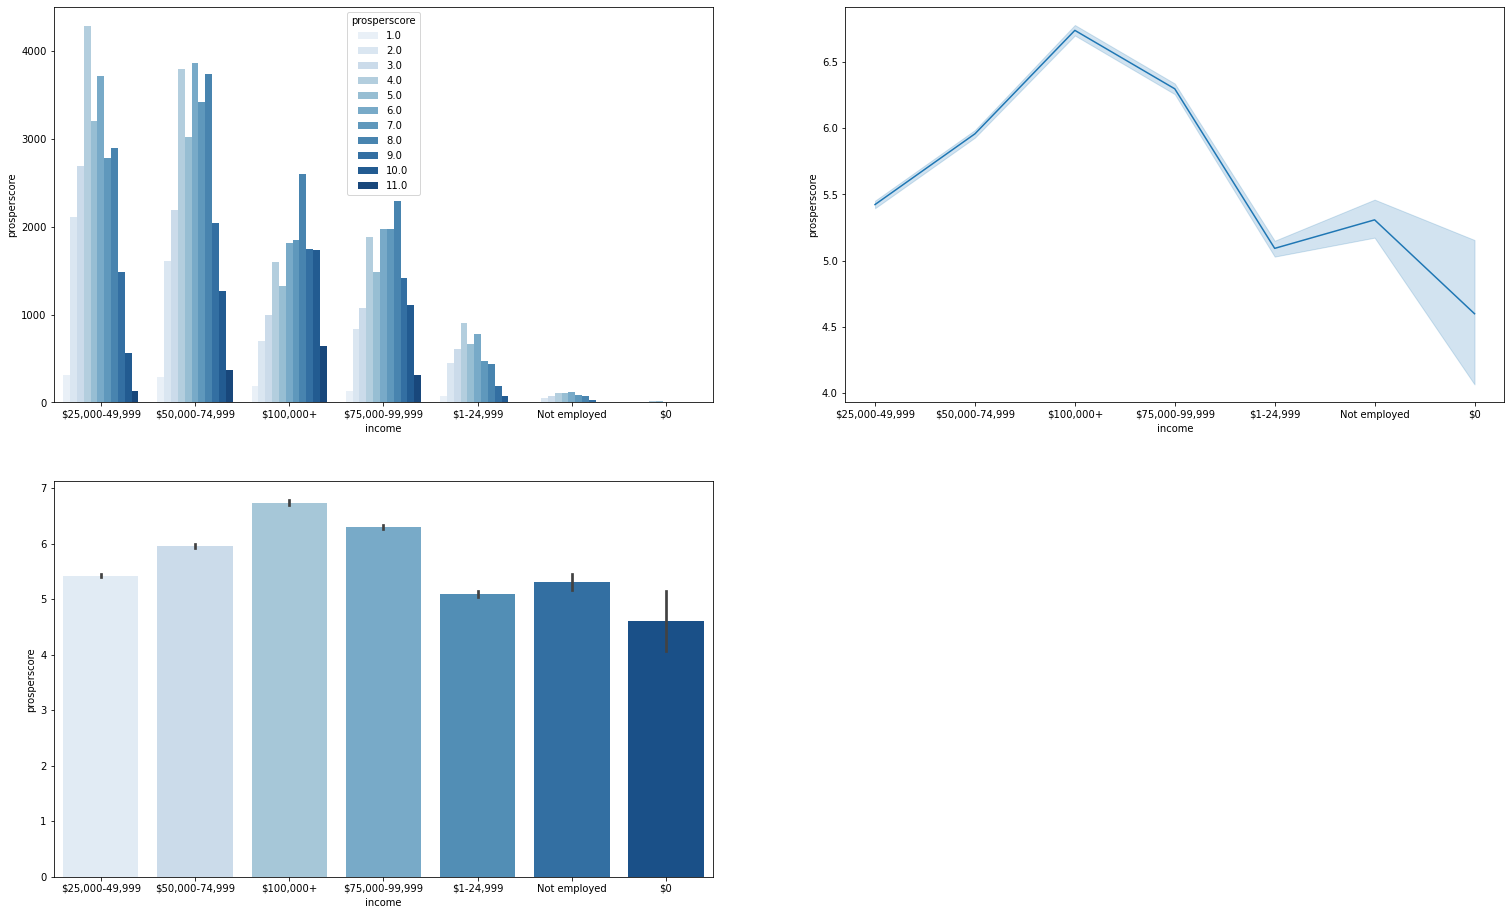

In [7]:
# plotting the graphs to understand the relationships
plt.figure(figsize=(26,16))
plt.subplot(2,2,1)
sns.countplot(data=loan_data,x="income", hue="prosperscore", palette = "Blues")
plt.ylabel("prosperscore")

plt.subplot(2,2,2)
sns.lineplot(data=loan_data,x="income", y="prosperscore", palette = "Blues")

plt.subplot(2,2,3)
sns.barplot(data=loan_data,x="income", y="prosperscore",palette = "Blues");

## Does Prosperscore and borrower annual percentage rate have any relationship?
> The correlation here shows that the higher the prosper score the higher borrower annual rate

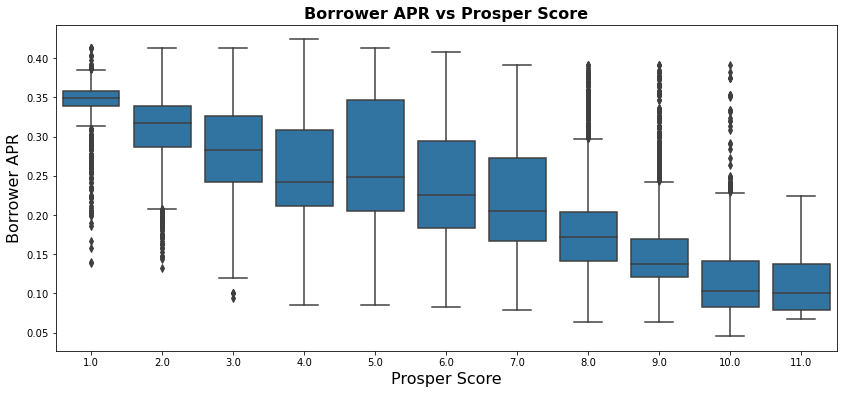

In [8]:
# plotting the graph
plt.figure(figsize=(14,6))
sns.boxplot(data =loan_data, x = "prosperscore", y = "borrower_apr",color = color)
plt.title("Borrower APR vs Prosper Score", fontsize=16, weight = "bold")
plt.xlabel("Prosper Score", fontsize=16)
plt.ylabel("Borrower APR", fontsize=16);

## Relationship between Employment status duration, borrower annual percentage rate and Isborrowerhomeowner
> In this relationship, it shows that the employment status tends to affect the borrower annual percentage rate. Someone who is unemployed will have a higher annual percentage rate to pay than someone who is employed.Also, if the person have a mortgage on his/her credit card(isborrowerhomeowner) it also lowers their rate.On the graph, it show us that the lowest rate is "Not available", this may mean that the person may also have an unregistered source of income.

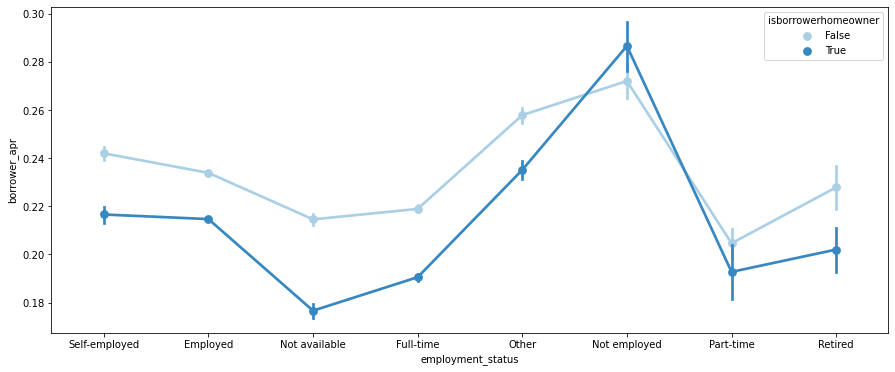

In [9]:
# Plotting the relationships
plt.figure(figsize=(15,6))
sns.pointplot(data = loan_data, x = "employment_status", y = "borrower_apr", hue = "isborrowerhomeowner", palette = "Blues")

In [24]:
# !jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt
!jupyter nbconvert Explanatory.ipynb --to slides --post serve --template output-toggle.tpl

[NbConvertApp] Converting notebook Explanatory.ipynb to slides
[NbConvertApp] Writing 550843 bytes to Explanatory.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Chinedu\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Chinedu\anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Chinedu\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\Chinedu\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\Chinedu\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\U